Note: this notebook has to be on the root otherwise I have problems with paths and modules

In [1]:
from utils.utils import plot_image_grid
from dataloaders.SegmentedImagesDataLoader import SegmentedImagesDataLoader
from dataloaders.ImagesAndSegmentationDataLoader import ImagesAndSegmentationDataLoader
from dataloaders.DynamicSegmentationDataLoader import DynamicSegmentationDataLoader
import torch

In [2]:
dataloder = SegmentedImagesDataLoader(
    dynamic_load=True, upscale_train=False, normalize=True, batch_size=32)
train_loader, val_loader = dataloder.get_train_val_dataloders()

Dynamic Load for Segmentation Dataloader: True
LOADED METADATA HAS LENGTH 7470
Metadata before split has length 7470
DF_TRAIN LENGTH: 5976
DF_VAL LENGTH: 1494


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


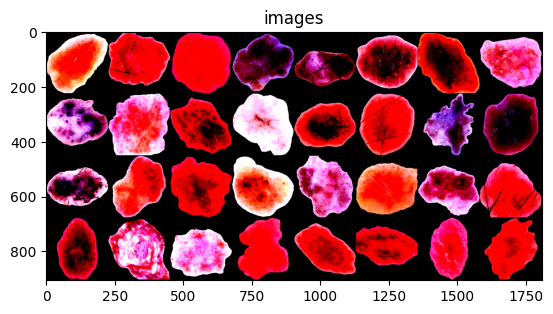

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


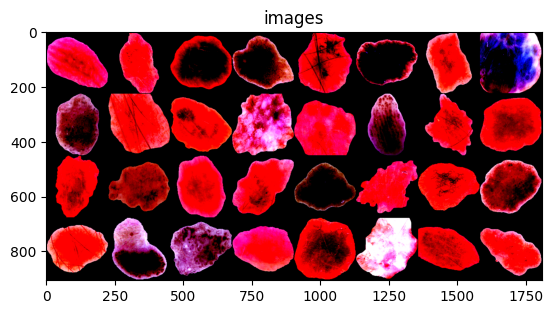

In [3]:
#NOTE: this if-else has to be done if you don't know which dataloader will be used, otherwise you can hardcode (image, label) or (image, label, segmentation)
for result in train_loader:
    if len(result) == 2:
        tr_images, tr_labels = result
    else:
        tr_images, tr_labels, segmentations = result
    tr_images = tr_images.to(torch.float32)
    plot_image_grid(tr_images, "images")
    if "segmentations" in locals():
        plot_image_grid(segmentations, "segmentations")
    break
for result in val_loader:
    if len(result) == 2:
        tr_images, tr_labels = result
    else:
        tr_images, tr_labels, segmentations = result
    tr_images = tr_images.to(torch.float32)
    plot_image_grid(tr_images, "images")
    if "segmentations" in locals():
        plot_image_grid(segmentations, "segmentations")
    break